In [1]:
import pandas as pd
import numpy as np

### Result Evaluation

Reading the input file

In [2]:
input_dataframe = pd.read_json("input/apostrophe.json")
display(input_dataframe)

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,"{'token': 'It', 'tag': 'PR'}","{'token': ''s', 'tag': 'VB'}","{'token': 'as', 'tag': 'CONJ'}","{'token': 'if', 'tag': 'CONJ'}","{'token': 'mga', 'tag': 'DT'}","{'token': 'bobo', 'tag': 'NOUN'}","{'token': 'at', 'tag': 'CONJ'}","{'token': 'tanga', 'tag': 'NOUN'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'mga', 'tag': 'DT'}",...,None,None,None,None,None,None,None,None,None,None
1,"{'token': 'And', 'tag': 'CONJ'}","{'token': 'there', 'tag': 'EX'}","{'token': ''s', 'tag': 'VB'}","{'token': 'this', 'tag': 'DT'}","{'token': 'fandom', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'isa', 'tag': 'CD'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'mga', 'tag': 'DT'}","{'token': 'sikat', 'tag': 'JJ'}",...,None,None,None,None,None,None,None,None,None,None
2,"{'token': 'Today', 'tag': 'NOUN'}","{'token': ''s', 'tag': 'POS'}","{'token': 'sages', 'tag': 'NOUN'}","{'token': 'will', 'tag': 'MD'}","{'token': 'be', 'tag': 'VB'}","{'token': 'tomorrow', 'tag': 'NOUN'}","{'token': ''s', 'tag': 'POS'}","{'token': 'scapegoats', 'tag': 'NOUN'}","{'token': '.', 'tag': 'PUNC'}",None,...,None,None,None,None,None,None,None,None,None,None
3,"{'token': 'Sit', 'tag': 'VB'}","{'token': 'on', 'tag': 'IN'}","{'token': 'Santa', 'tag': 'PROPN'}","{'token': ''s', 'tag': 'POS'}","{'token': 'lap45', 'tag': 'NOUN'}","{'token': '.', 'tag': 'PUNC'}",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{'token': 'How', 'tag': 'RB'}","{'token': 'about', 'tag': 'IN'}","{'token': 'Chevrolet', 'tag': 'PROPN'}","{'token': 'Sail', 'tag': 'PROPN'}","{'token': ''s', 'tag': 'POS'}","{'token': 'resale', 'tag': 'NOUN'}","{'token': 'value', 'tag': 'NOUN'}","{'token': '?', 'tag': 'PUNC'}",None,None,...,None,None,None,None,None,None,None,None,None,None
5,"{'token': 'Umaasang', 'tag': 'VB'}","{'token': 'makakaahon', 'tag': 'VB'}","{'token': 'mula', 'tag': 'RB'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'kinasadlakang', 'tag': 'NOUN'}","{'token': 'apat', 'tag': 'CD'}","{'token': 'na', 'tag': 'CCP'}","{'token': 'sunod', 'tag': 'JJ'}","{'token': 'na', 'tag': 'CCP'}","{'token': 'kabiguan', 'tag': 'NOUN'}",...,"{'token': 'maibigay', 'tag': 'VB'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'tulong', 'tag': 'NOUN'}","{'token': 'na', 'tag': 'CCP'}","{'token': 'hinihingi', 'tag': 'VB'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'kanya', 'tag': 'PR'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'Beermen', 'tag': 'PROPN'}","{'token': '.', 'tag': 'PUNC'}"
6,"{'token': 'Malaking', 'tag': 'JJ'}","{'token': 'kapalpakan', 'tag': 'NOUN'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'nagawa', 'tag': 'VB'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'inupahang', 'tag': 'VB'}","{'token': 'tao', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'pamunuan', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}",...,None,None,None,None,None,None,None,None,None,None
7,"{'token': 'Ganu'n', 'tag': 'PR'}","{'token': 'kababaw', 'tag': 'NOUN'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'bashers', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'mga', 'tag': 'DT'}","{'token': 'Atayde', 'tag': 'PROPN'}","{'token': '.', 'tag': 'PUNC'}","{'token': 'Kaya', 'tag': 'CONJ'}","{'token': 'pala', 'tag': 'NOUN'}",...,None,None,None,None,None,None,None,None,None,None
8,"{'token': 'Sa', 'tag': 'CONJ'}","{'token': 'unang', 'tag': 'CD'}","{'token': 'araw', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'Pasko', 'tag': 'PROPN'}","{'token': ',', 'tag': 'PUNC'}","{'token': 'binigay', 'tag': 'VB'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': ''kin', 'tag': 'PR'}","{'token': 'ng', 'tag': 'CONJ'}",...,None,None,None,None,None,None,None,None,None,None
9,"{'token': ''Yung', 'tag': 'PR'}","{'token': 'delivery', 'tag': 'NOUN'}","{'token': 'address', 'tag': 'NOUN'}","{'token': 'po', 'tag': 'RB'}","{'token': 'ba', 'tag': 'RB'}","{'token': 'ay', 'tag': 'LM'}","{'token': ''yung', 'tag': 'PR'}","{'token

Reading the output files

In [3]:
ff_combi1_output = pd.read_csv("output/apostrophe/Flair-FSPOST-Combination-1-apostrophe.csv")
ff_combi2_output = pd.read_csv("output/apostrophe/Flair-FSPOST-Combination-2-apostrophe.csv")
sf_combi1_output = pd.read_csv("output/apostrophe/Spacy-FSPOST-Combination-1-apostrophe.csv")
sf_combi2_output = pd.read_csv("output/apostrophe/Spacy-FSPOST-Combination-2-apostrophe.csv")

Functions to be used for results evaluation

In [4]:
def fixed_columns(output):
    output['general_tags'] = output['general_tags'].apply(eval)
    output['specific_tags'] = output['specific_tags'].apply(eval)
    output['token_tagset'] = output['token_tagset'].apply(eval)
    
    return output

In [5]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [6]:
ff_combi1_output = fixed_columns(ff_combi1_output)
ff_combi2_output = fixed_columns(ff_combi2_output)
sf_combi1_output = fixed_columns(sf_combi1_output)
sf_combi2_output = fixed_columns(sf_combi2_output)

In [7]:
ff_combi1_tag_counts = to_1D(ff_combi1_output['general_tags']).value_counts()
ff_combi1_total = ff_combi1_tag_counts.sum()

ff_combi2_tag_counts = to_1D(ff_combi2_output['general_tags']).value_counts()
ff_combi2_total = ff_combi2_tag_counts.sum()

sf_combi1_tag_counts = to_1D(sf_combi1_output['general_tags']).value_counts()
sf_combi1_total = sf_combi1_tag_counts.sum()

sf_combi2_tag_counts = to_1D(sf_combi2_output['general_tags']).value_counts()
sf_combi2_total = sf_combi2_tag_counts.sum()

In [8]:
def print_tag_counts(tag_counts, total, tagger):
    print(tag_counts)
    print(tagger, " total tokens: ", total, "\n")

In [9]:
print_tag_counts(ff_combi1_tag_counts, ff_combi1_total, "Flair-FSPOST Combi1")
print_tag_counts(ff_combi2_tag_counts, ff_combi2_total, "Flair-FSPOST Combi2")
print_tag_counts(sf_combi1_tag_counts, sf_combi1_total, "Spacy-FSPOST Combi1")
print_tag_counts(sf_combi2_tag_counts, sf_combi2_total, "Spacy-FSPOST Combi2")

NOUN     57
CONJ     40
PROPN    36
DT       34
PR       28
PUNC     21
RB       20
VBPR     18
CCP      18
VB       15
JJ        9
IN        7
VBFT      7
VBPT      7
CD        5
FW        2
SYM       2
MD        1
UH        1
LM        1
Name: count, dtype: int64
Flair-FSPOST Combi1  total tokens:  329 

NOUN     42
CONJ     36
DT       34
PROPN    32
RB       28
FW       25
PR       24
PUNC     20
CCP      18
VB       15
VBPR     10
JJ        9
VBPT      7
POS       6
IN        6
CD        6
VBFT      6
SYM       2
EX        1
MD        1
LM        1
Name: count, dtype: int64
Flair-FSPOST Combi2  total tokens:  329 

NOUN     59
CONJ     40
DT       34
PROPN    33
PR       28
PUNC     20
RB       20
VBPR     18
CCP      18
VB       15
JJ        9
IN        7
VBFT      7
VBPT      7
CD        5
SYM       3
FW        2
MD        1
ADD       1
UH        1
LM        1
Name: count, dtype: int64
Spacy-FSPOST Combi1  total tokens:  329 

NOUN     47
PROPN    42
CONJ     36
DT       34
RB  

Overall Accuracy

In [10]:
pos_temp = []
tags_list = []

for i in range(len(input_dataframe)):
    pos_temp.clear()
    
    for j in range(input_dataframe.iloc[i].count()):
        pos_temp.append(input_dataframe.iloc[i][j].__getitem__("tag"))
    
    temp = np.array(pos_temp)
    tags_list.append(temp)

In [11]:
test_data_counts = to_1D(tags_list).value_counts()
test_data_counts_total = test_data_counts.sum()

print_tag_counts(test_data_counts, test_data_counts_total, "Test data counts")

NOUN     56
CONJ     44
PROPN    38
VB       38
DT       33
RB       26
PR       25
PUNC     20
CCP      17
JJ        9
CD        8
POS       6
IN        3
SYM       2
LM        2
MD        1
EX        1
Name: count, dtype: int64
Test data counts  total tokens:  329 



In [12]:
def get_overall_accuracy(output):
    accuracy = []
    for i in range(len(tags_list)):
        counter = 0
        for j in range(len(tags_list[i])):
            if tags_list[i][j] == output['general_tags'][i][j]:
                counter = counter + 1
                
        accuracy.append(counter / len(tags_list[i]))
        
    return accuracy

In [13]:
def print_overall_accuracy(output, tagger):
    accuracy = get_overall_accuracy(output)
    print(tagger, ' accuracy: %f' % (sum(accuracy) / len(accuracy)))

In [14]:
print_overall_accuracy(ff_combi1_output, "Flair-FSPOST Combi1")
print_overall_accuracy(sf_combi1_output, "Spacy-FSPOST Combi1")
print_overall_accuracy(ff_combi2_output, "Flair-FSPOST Combi2")
print_overall_accuracy(sf_combi2_output, "Spacy-FSPOST Combi2")

Flair-FSPOST Combi1  accuracy: 0.764133
Spacy-FSPOST Combi1  accuracy: 0.759514
Flair-FSPOST Combi2  accuracy: 0.799458
Spacy-FSPOST Combi2  accuracy: 0.811758


Taking the Accuracy per POS tag

In [15]:
possible_tags = ['NOUN', 'PROPN', 'PR', 'DT', 'LM', 'CONJ', 'CCP', 'IN', 'VB', 'JJ', 'CD', 'RB', 'UH',
                  'TS', 'FW', 'PUNC', 'SYM', 'EX', 'TO', 'ADD', 'POS', 'PDT', 'XX', 'MD', 'AFX']

In [16]:
def get_accuracy_per_tags(output, tag):
    counter_right = 0
    counter_total = 0
    for i in range(len(tags_list)):
        for j in range(len(tags_list[i])):
            if tags_list[i][j] == tag:
                counter_total = counter_total + 1
                if tags_list[i][j] == 'VB':
                    if (output['general_tags'][i][j] == 'VB' or output['general_tags'][i][j] == 'VBPT' or
                    output['general_tags'][i][j] == 'VBPR' or output['general_tags'][i][j] == 'VBFT'):
                        counter_right = counter_right + 1
                elif tags_list[i][j] == output['general_tags'][i][j]:
                    counter_right = counter_right + 1
    
    if counter_total == 0:
        return None
    else:
        return counter_right / counter_total * 100

In [17]:
def print_accuracy_per_tags(output, tagger):
    print("Tagger: ", tagger)
    for i in range(len(possible_tags)):
        accuracy = get_accuracy_per_tags(output, possible_tags[i])
        if accuracy != None:
            print('POS Tag: ', possible_tags[i], ' accuracy: %f' % accuracy)
            
    print("\n")

In [18]:
print_accuracy_per_tags(ff_combi1_output, "Flair-FSPOST Combi1")
print_accuracy_per_tags(sf_combi1_output, "Spacy-FSPOST Combi1")
print_accuracy_per_tags(ff_combi2_output, "Flair-FSPOST Combi2")
print_accuracy_per_tags(sf_combi2_output, "Spacy-FSPOST Combi2")

Tagger:  Flair-FSPOST Combi1
POS Tag:  NOUN  accuracy: 91.071429
POS Tag:  PROPN  accuracy: 92.105263
POS Tag:  PR  accuracy: 92.000000
POS Tag:  DT  accuracy: 100.000000
POS Tag:  LM  accuracy: 50.000000
POS Tag:  CONJ  accuracy: 81.818182
POS Tag:  CCP  accuracy: 100.000000
POS Tag:  IN  accuracy: 33.333333
POS Tag:  VB  accuracy: 97.368421
POS Tag:  JJ  accuracy: 77.777778
POS Tag:  CD  accuracy: 62.500000
POS Tag:  RB  accuracy: 61.538462
POS Tag:  PUNC  accuracy: 100.000000
POS Tag:  SYM  accuracy: 100.000000
POS Tag:  EX  accuracy: 0.000000
POS Tag:  POS  accuracy: 0.000000
POS Tag:  MD  accuracy: 100.000000


Tagger:  Spacy-FSPOST Combi1
POS Tag:  NOUN  accuracy: 89.285714
POS Tag:  PROPN  accuracy: 84.210526
POS Tag:  PR  accuracy: 92.000000
POS Tag:  DT  accuracy: 100.000000
POS Tag:  LM  accuracy: 50.000000
POS Tag:  CONJ  accuracy: 81.818182
POS Tag:  CCP  accuracy: 100.000000
POS Tag:  IN  accuracy: 33.333333
POS Tag:  VB  accuracy: 97.368421
POS Tag:  JJ  accuracy: 77.7777

Genarating Confusion Matrix

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
actual_tags = []
predicted_tags = []
for i in range(len(tags_list)):
    for j in range(len(tags_list[i])):
        actual_tags.append(tags_list[i][j])
        if (ff_combi1_output['general_tags'][i][j] == 'VB' or ff_combi1_output['general_tags'][i][j] == 'VBPT' or
                ff_combi1_output['general_tags'][i][j] == 'VBPR' or ff_combi1_output['general_tags'][i][j] == 'VBFT'):
            predicted_tags.append('VB')
        else:
            predicted_tags.append(ff_combi1_output['general_tags'][i][j])

In [21]:
# dataset_pos_tags = ['NOUN', 'PROPN', 'PR', 'DT', 'LM', 'CONJ', 'CCP', 'IN', 'VB', 'JJ', 'CD', 'RB', 'UH',
#                  'TS', 'FW', 'PUNC', 'SYM', 'EX', 'TO', 'POS', 'XX', 'MD']

# VERB
# dataset_pos_tags = ['NOUN', 'CONJ', 'VB', 'PR', 'JJ', 'RB', 'PUNC', 'DT', 'CCP', 'PROPN', 'MD', 'UH', 'CD', 'TO', 'LM', 'IN']

#Homographs
# dataset_pos_tags = ['NOUN', 'CONJ', 'VB', 'RB', 'PR', 'DT', 'PUNC', 'PROPN', 'JJ', 'CCP', 'CD', 'LM', 'SYM', 'IN', 'XX', 'UH', 'TO', 'MD', 'FW']

#Apostrophe
dataset_pos_tags = ['NOUN', 'CONJ', 'PROPN', 'VB', 'DT', 'RB', 'PR', 'PUNC', 'CCP', 'JJ', 'CD', 'POS', 'IN', 'SYM', 'LM', 'MD', 'EX']

In [22]:
def clean_labels(label):
    return str(label).replace("['", '').replace("']", '')

In [23]:
def generate_confusion_matrix(combi):
    actual_tags = []
    predicted_tags = []
    for i in range(len(tags_list)):
        for j in range(len(tags_list[i])):
            actual_tags.append(tags_list[i][j])
            if (combi['general_tags'][i][j] == 'VB' or combi['general_tags'][i][j] == 'VBPT' or
                    combi['general_tags'][i][j] == 'VBPR' or combi['general_tags'][i][j] == 'VBFT'):
                predicted_tags.append('VB')
            else:
                predicted_tags.append(combi['general_tags'][i][j])
            
    np.seterr(invalid='ignore')
    plt.figure(figsize=(60, 40))
    plt.rcParams.update({'font.size': 32})
    cm = metrics.confusion_matrix(actual_tags, predicted_tags, labels=dataset_pos_tags, normalize='true')
    cm_df = pd.DataFrame(cm, columns=dataset_pos_tags)
    order = np.argsort(-cm_df.to_numpy().diagonal())
    
    label_df = pd.DataFrame(dataset_pos_tags)
    label_df = label_df.iloc[order].to_numpy()
    
    labels = []
    for i in range(len(label_df)):
        labels.append(clean_labels(label_df[i]))
    
    fx = sns.heatmap(cm_df.iloc[order, order], annot=True, fmt=".2f", cmap=plt.cm.Blues)
    fx.set_title('Confusion Matrix \n')
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('\n Actual Values\n')
    fx.xaxis.set_ticklabels(labels)
    fx.yaxis.set_ticklabels(labels)
    plt.show()
    
    print(metrics.classification_report(actual_tags, predicted_tags))

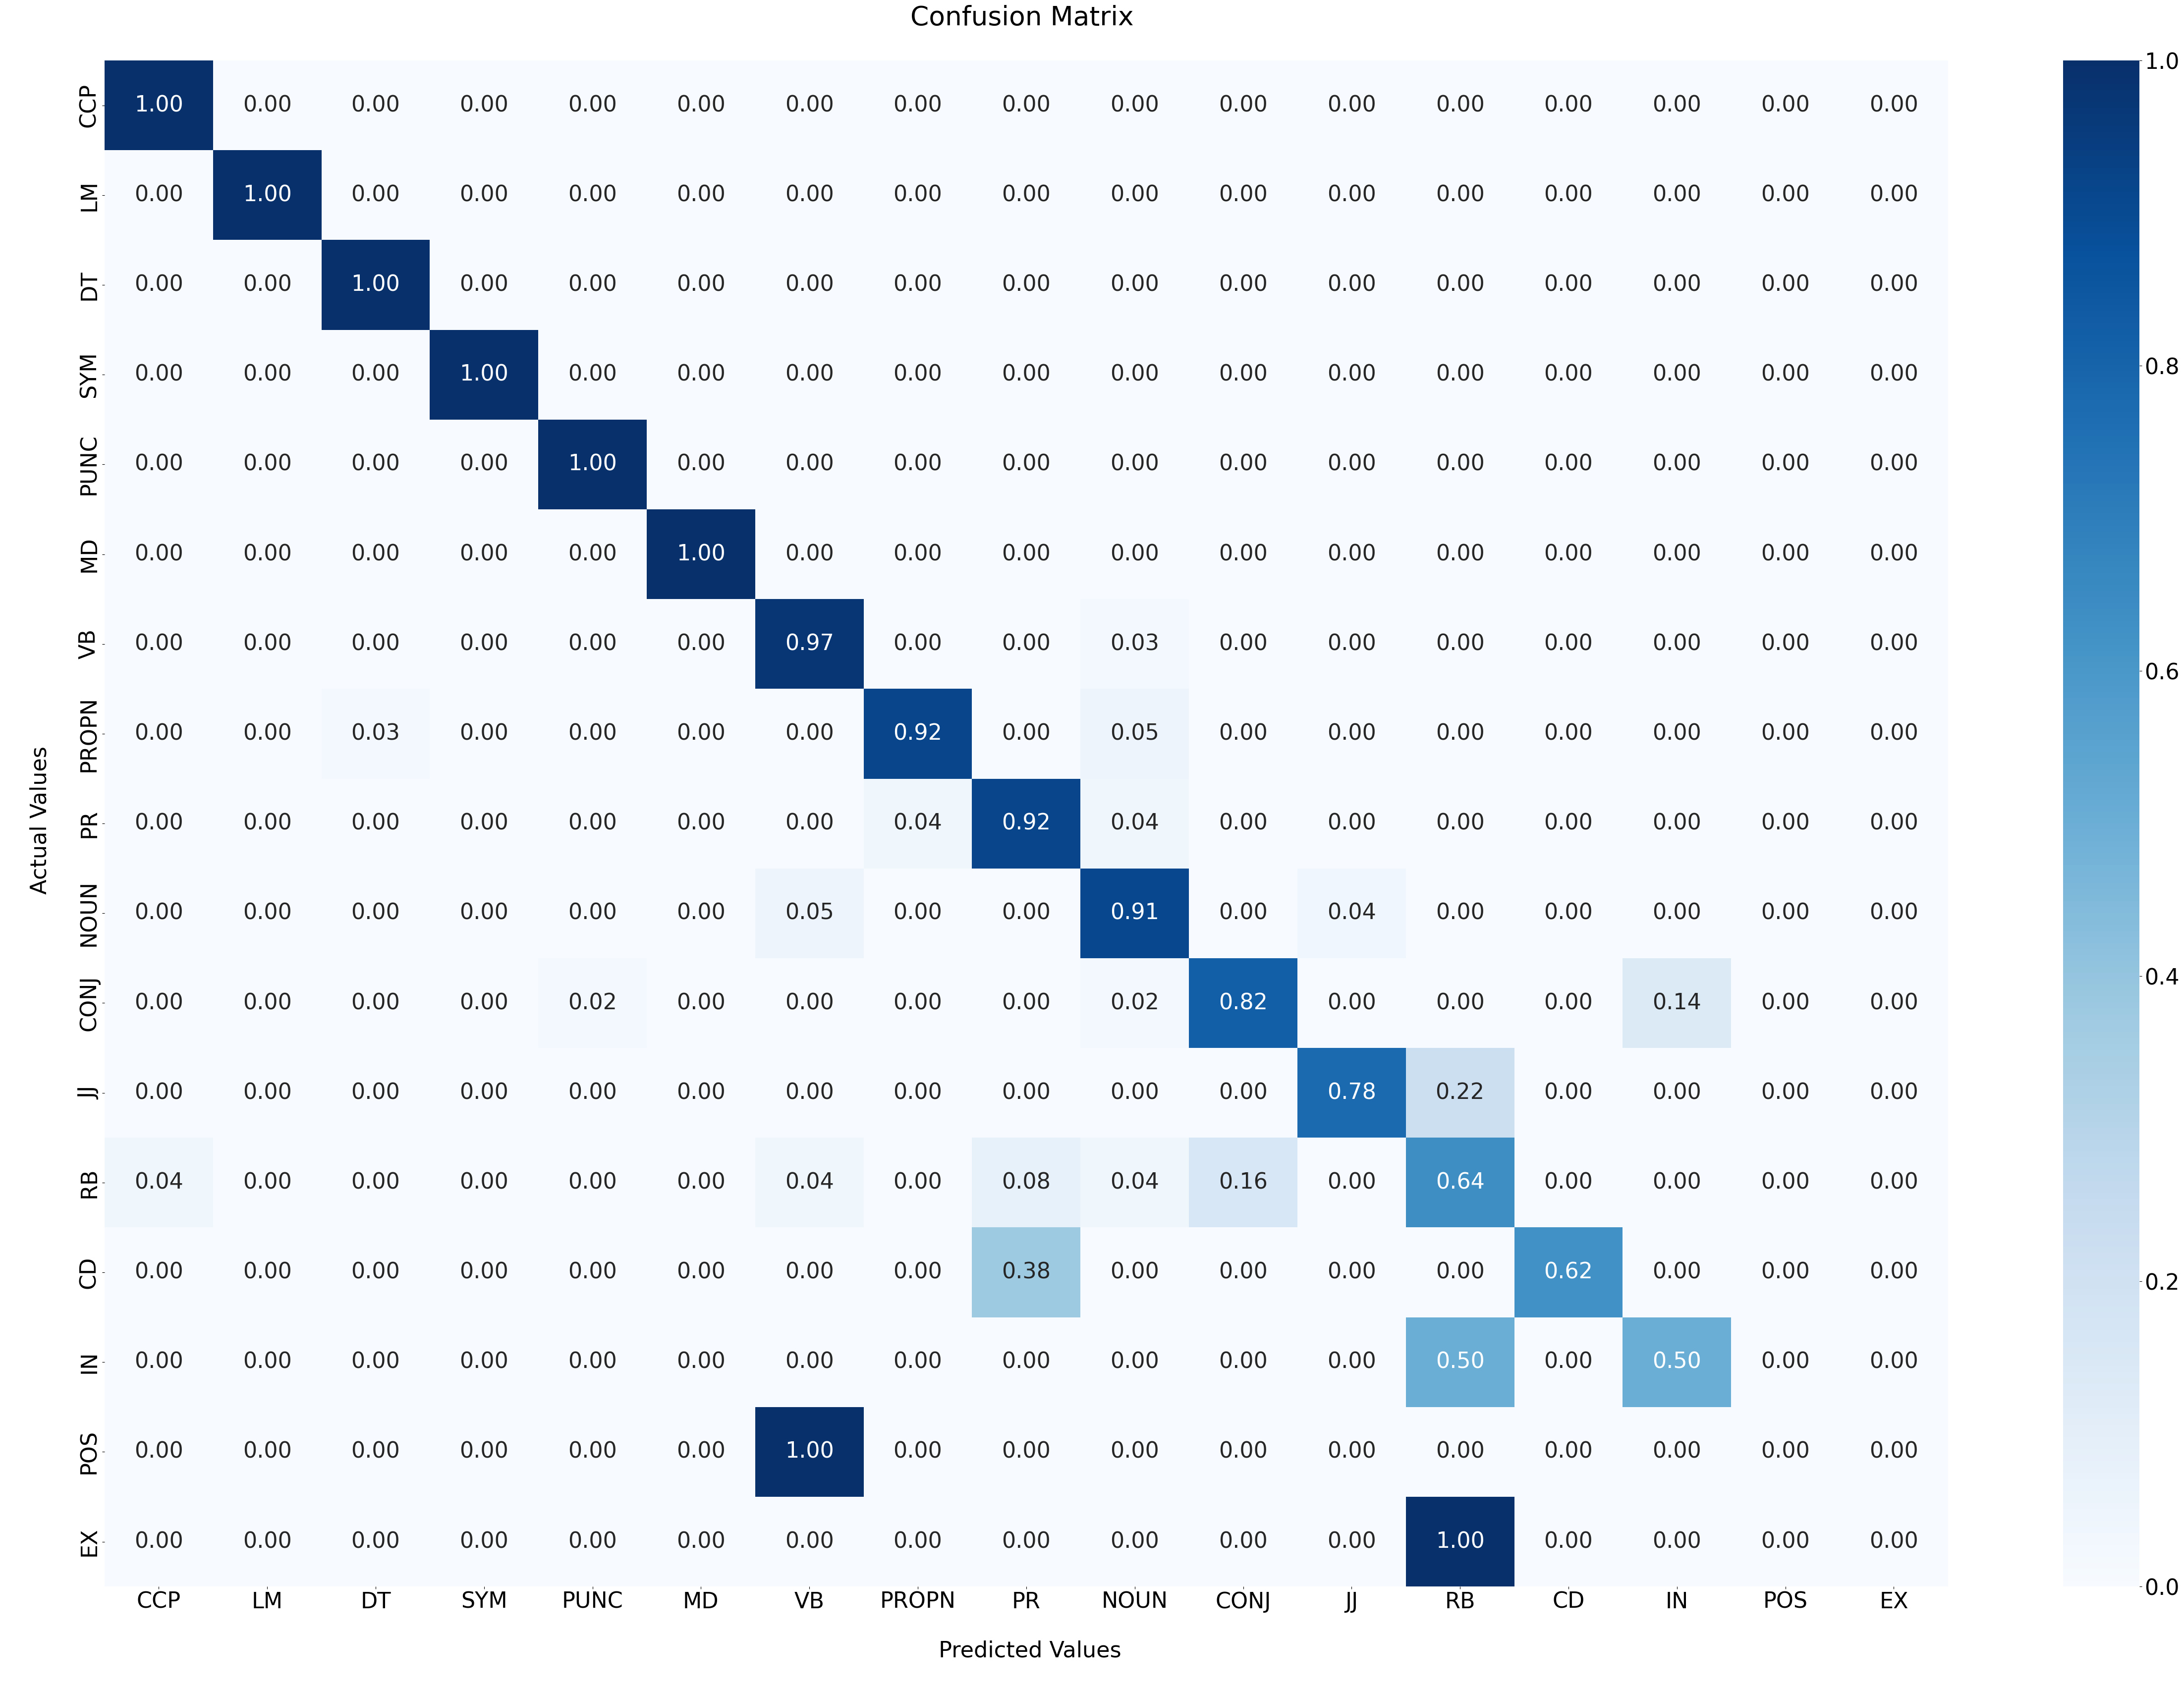

              precision    recall  f1-score   support

         CCP       0.94      1.00      0.97        17
          CD       1.00      0.62      0.77         8
        CONJ       0.90      0.82      0.86        44
          DT       0.97      1.00      0.99        33
          EX       0.00      0.00      0.00         1
          FW       0.00      0.00      0.00         0
          IN       0.14      0.33      0.20         3
          JJ       0.78      0.78      0.78         9
          LM       1.00      0.50      0.67         2
          MD       1.00      1.00      1.00         1
        NOUN       0.89      0.91      0.90        56
         POS       0.00      0.00      0.00         6
          PR       0.82      0.92      0.87        25
       PROPN       0.97      0.92      0.95        38
        PUNC       0.95      1.00      0.98        20
          RB       0.80      0.62      0.70        26
         SYM       1.00      1.00      1.00         2
          UH       0.00    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [24]:
generate_confusion_matrix(ff_combi1_output)

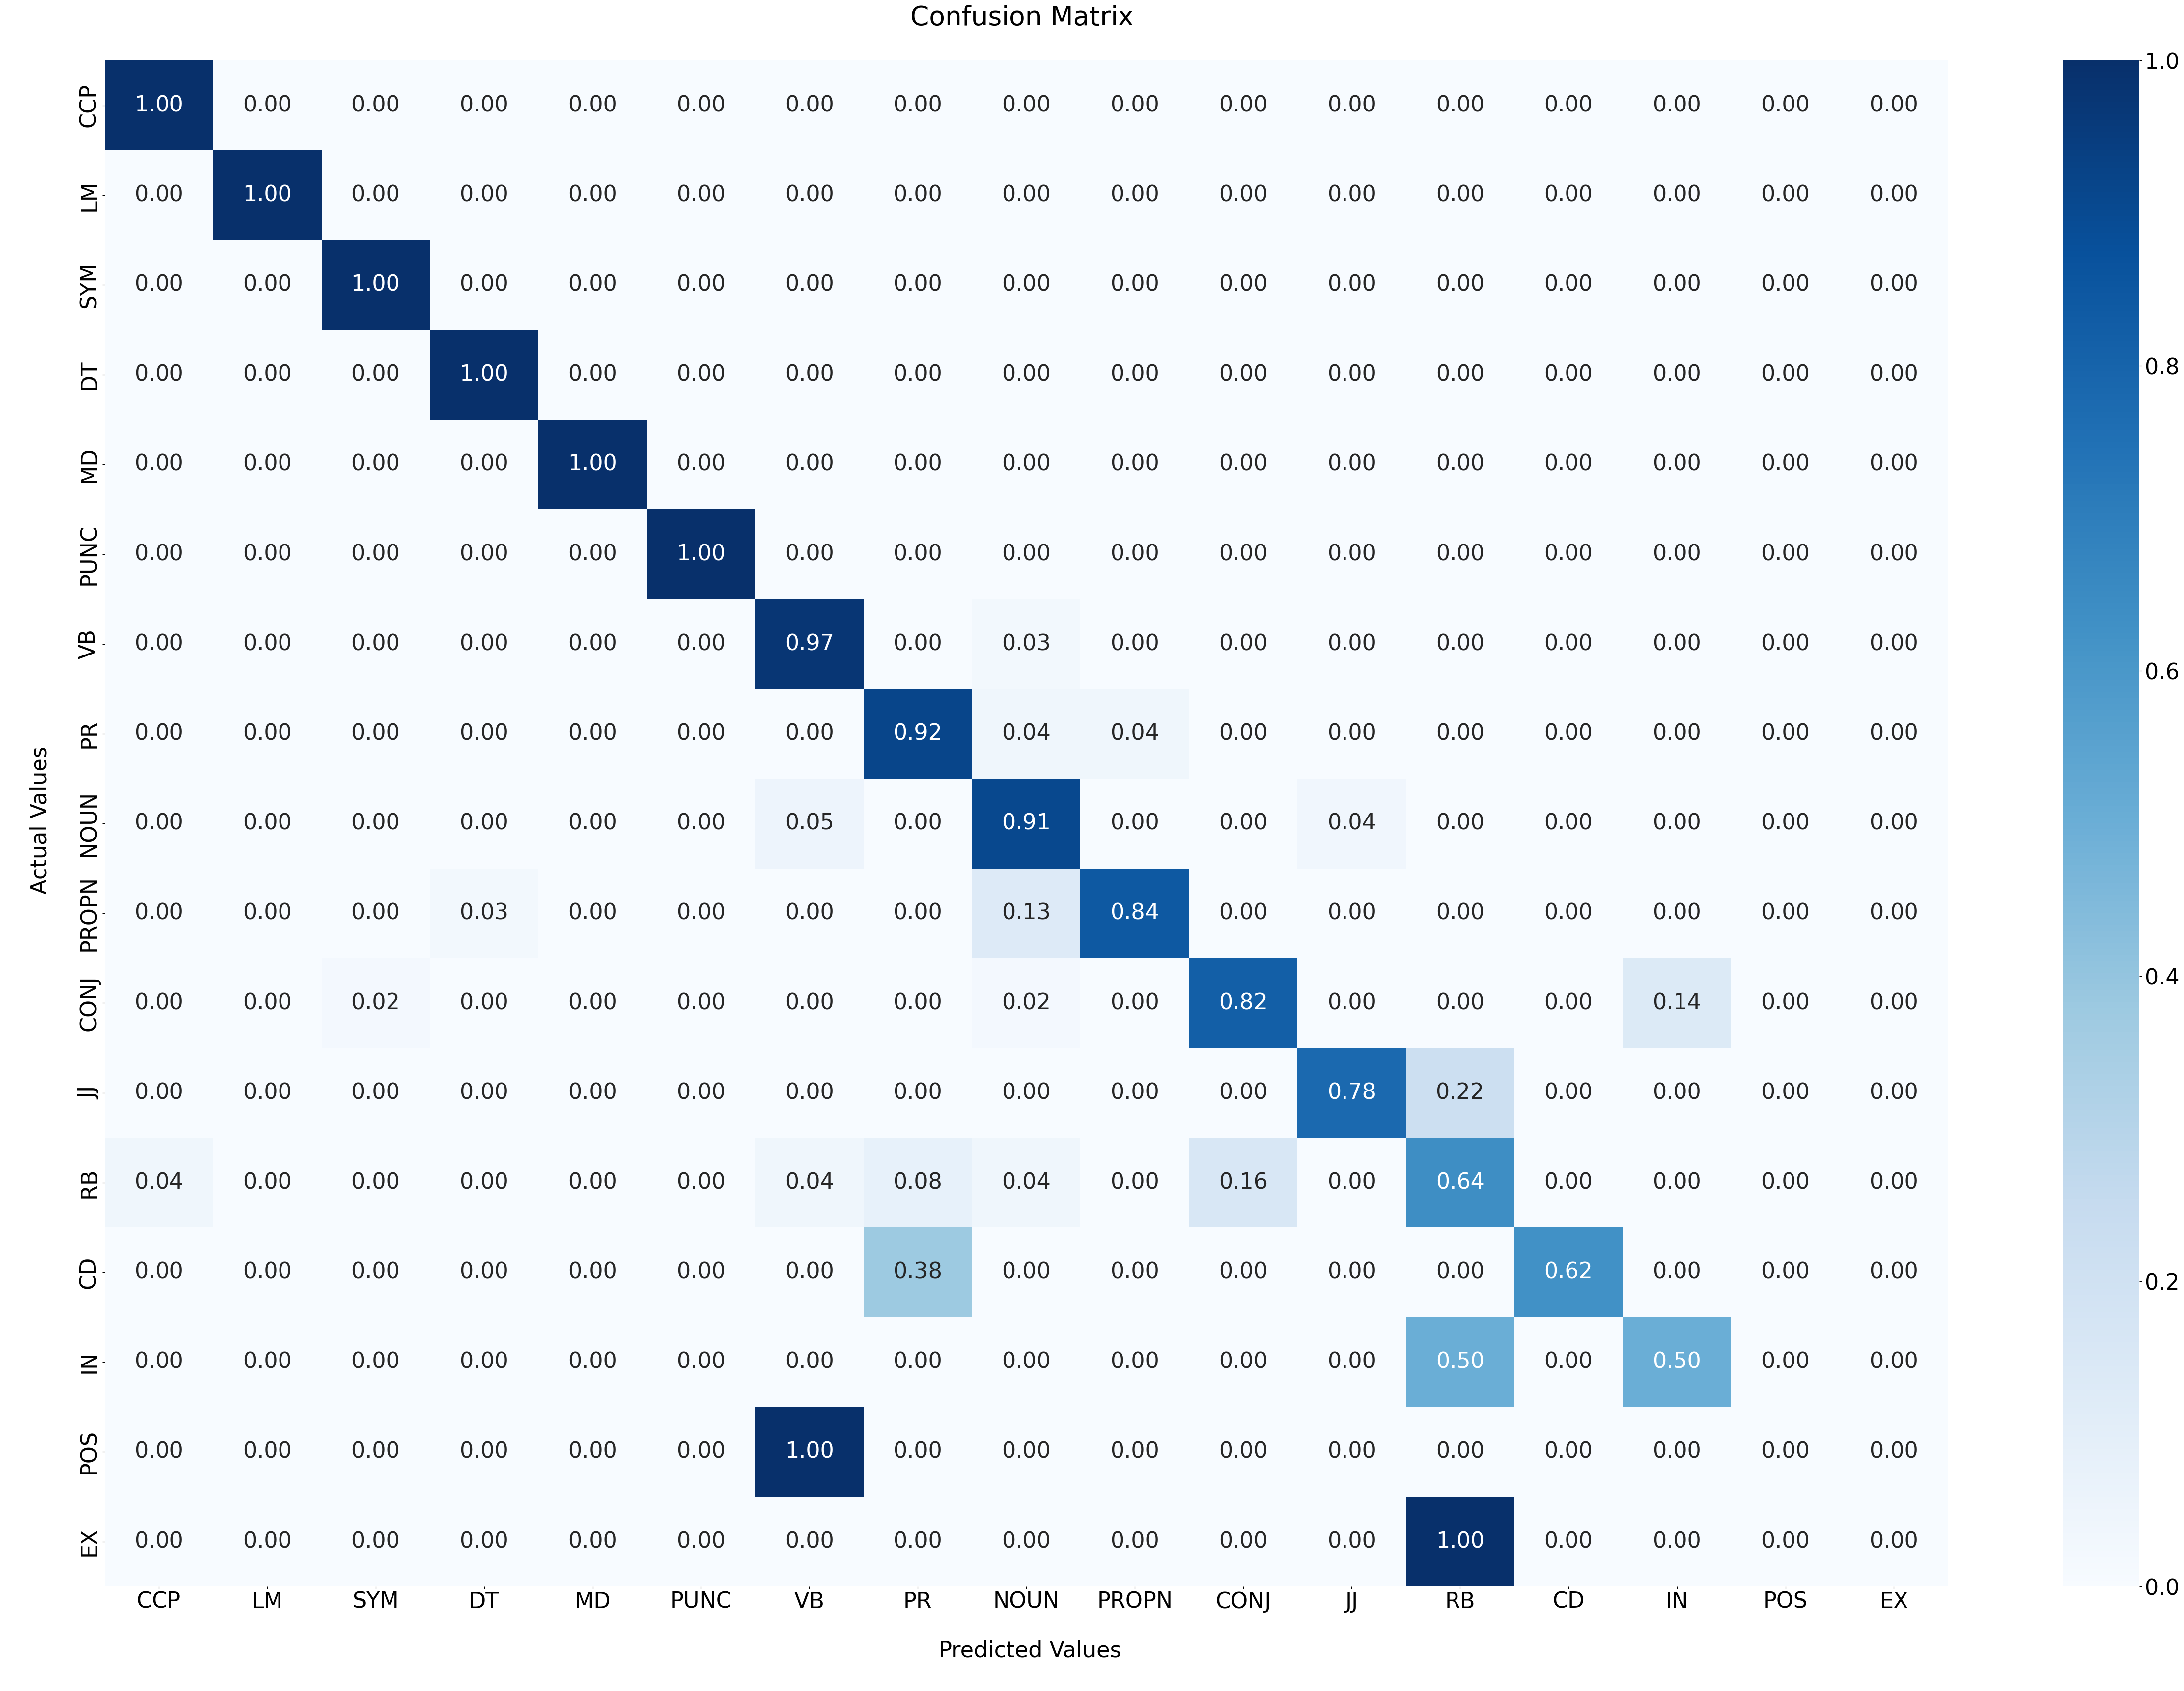

              precision    recall  f1-score   support

         ADD       0.00      0.00      0.00         0
         CCP       0.94      1.00      0.97        17
          CD       1.00      0.62      0.77         8
        CONJ       0.90      0.82      0.86        44
          DT       0.97      1.00      0.99        33
          EX       0.00      0.00      0.00         1
          FW       0.00      0.00      0.00         0
          IN       0.14      0.33      0.20         3
          JJ       0.78      0.78      0.78         9
          LM       1.00      0.50      0.67         2
          MD       1.00      1.00      1.00         1
        NOUN       0.85      0.89      0.87        56
         POS       0.00      0.00      0.00         6
          PR       0.82      0.92      0.87        25
       PROPN       0.97      0.84      0.90        38
        PUNC       1.00      1.00      1.00        20
          RB       0.80      0.62      0.70        26
         SYM       0.67    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [25]:
generate_confusion_matrix(sf_combi1_output)

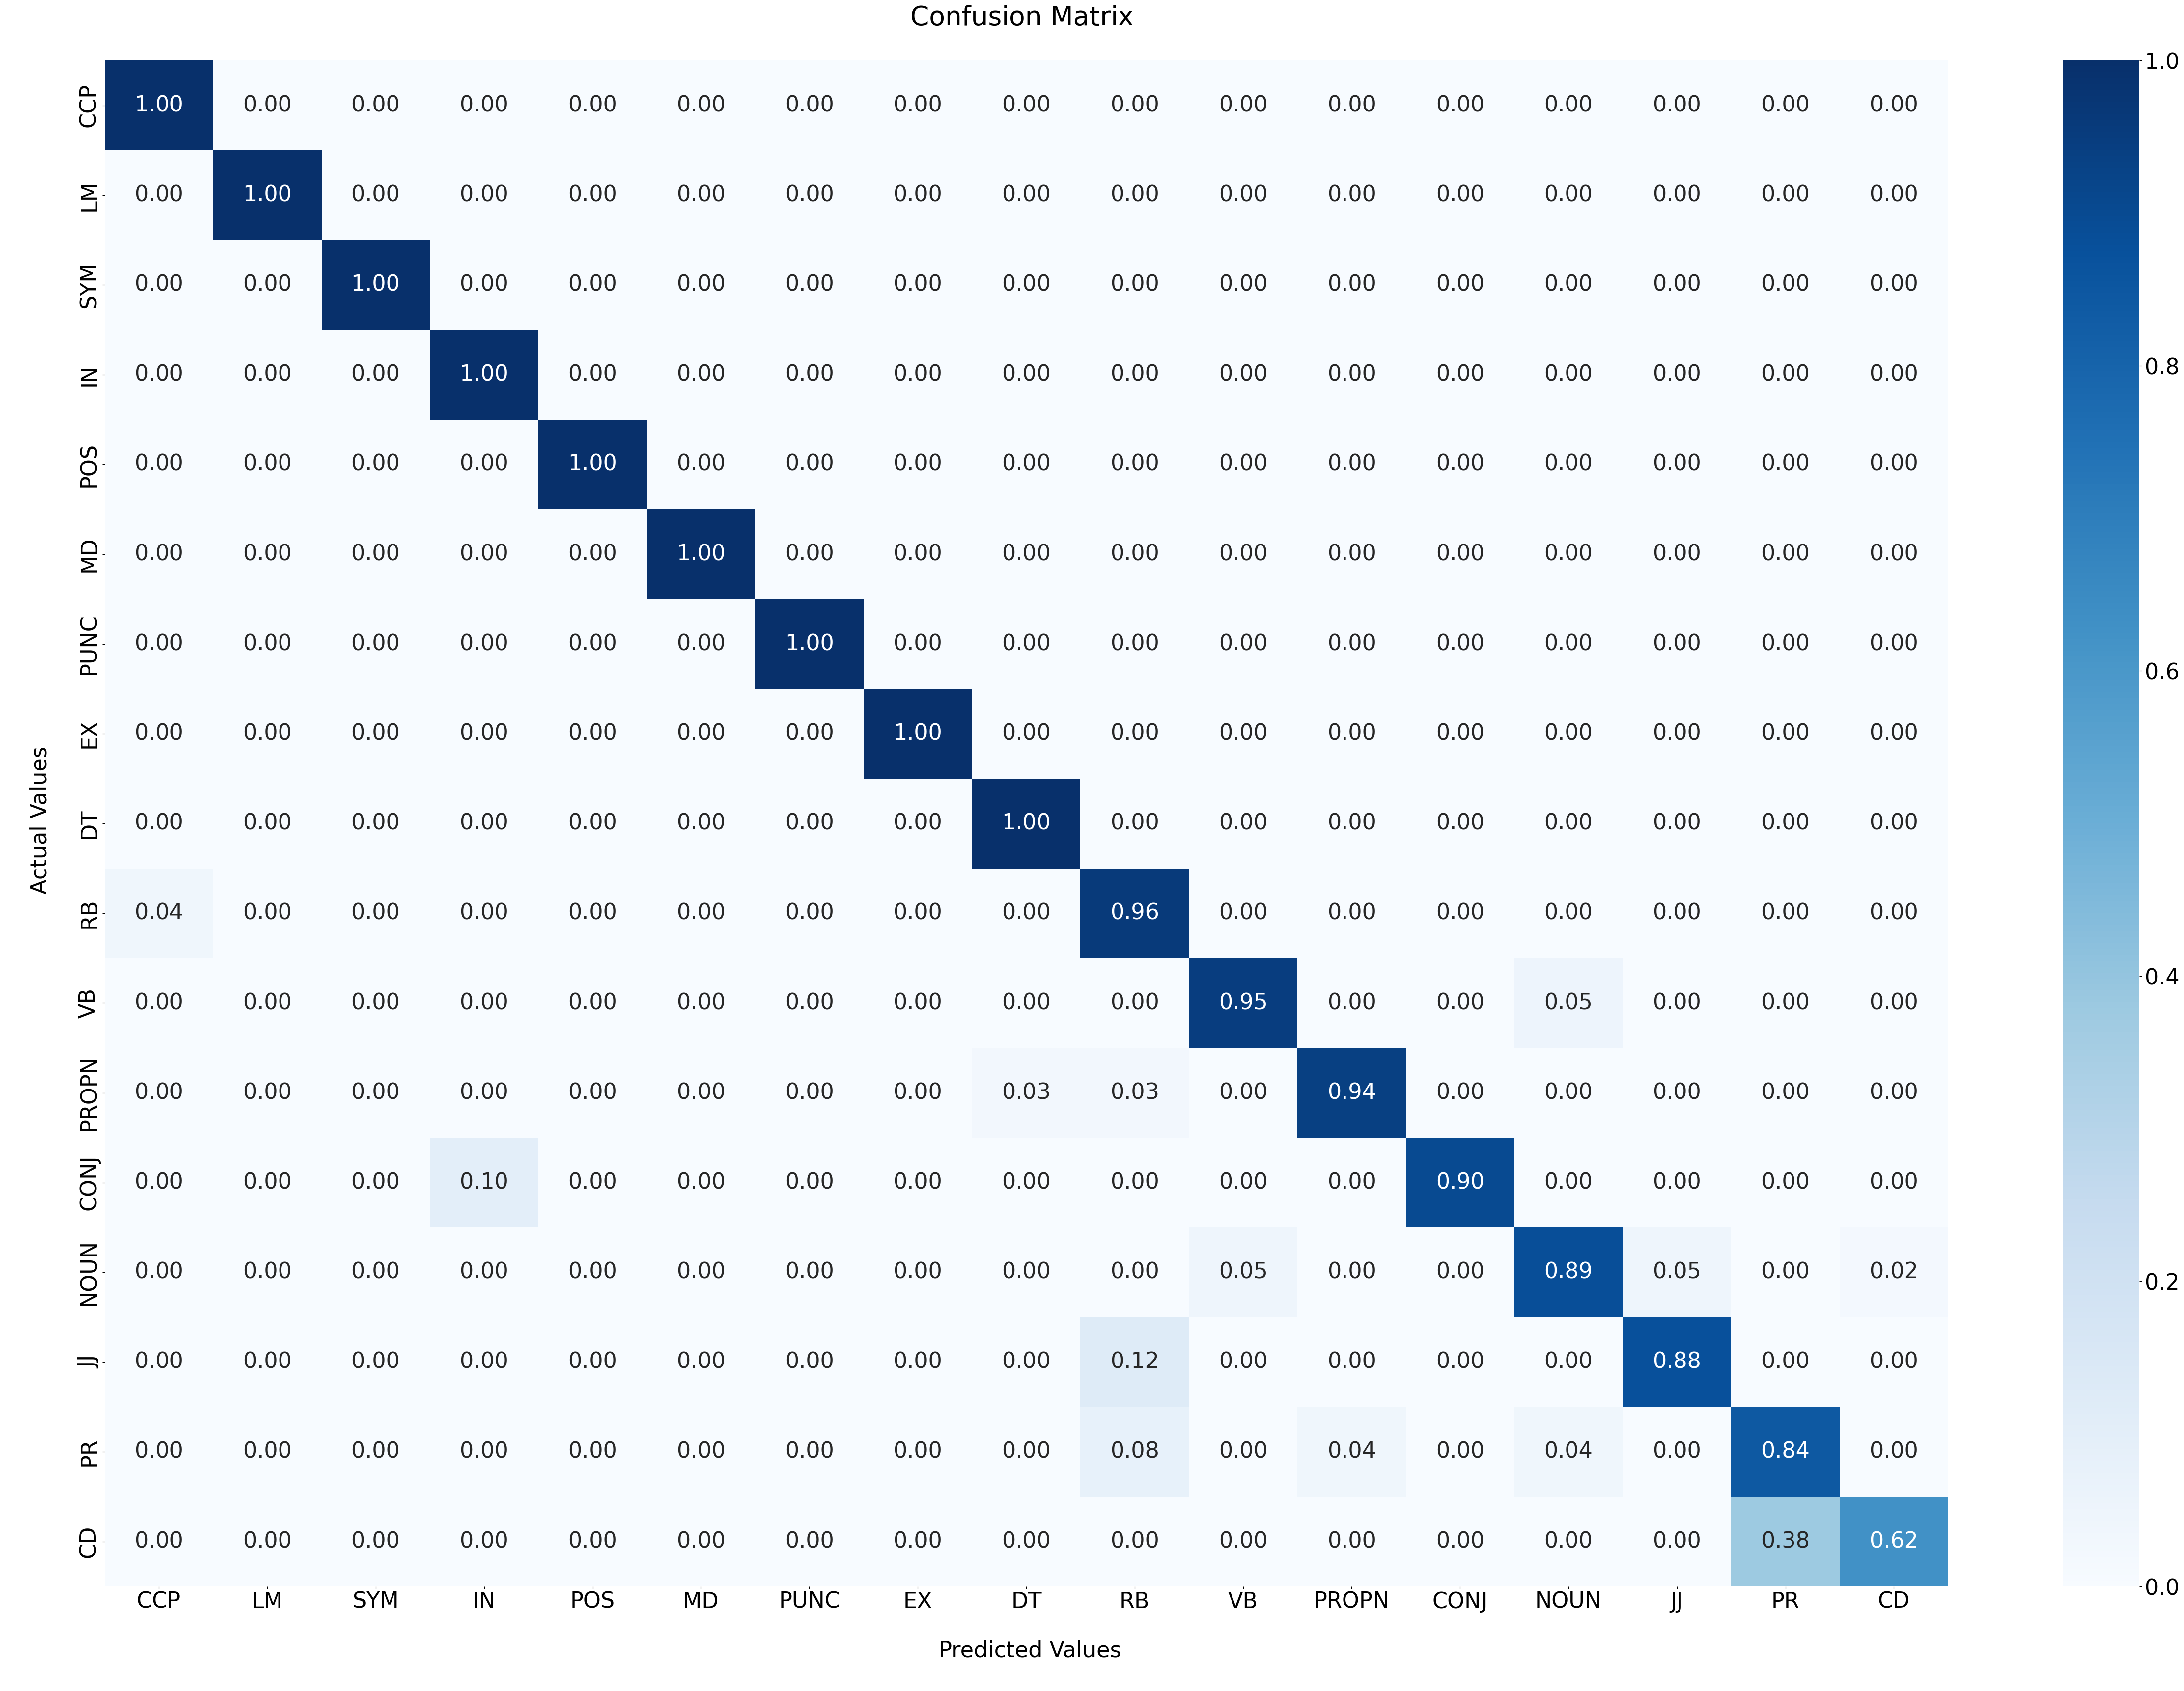

              precision    recall  f1-score   support

         CCP       0.94      1.00      0.97        17
          CD       0.83      0.62      0.71         8
        CONJ       1.00      0.82      0.90        44
          DT       0.97      1.00      0.99        33
          EX       1.00      1.00      1.00         1
          FW       0.00      0.00      0.00         0
          IN       0.33      0.67      0.44         3
          JJ       0.78      0.78      0.78         9
          LM       1.00      0.50      0.67         2
          MD       1.00      1.00      1.00         1
        NOUN       0.93      0.70      0.80        56
         POS       1.00      1.00      1.00         6
          PR       0.88      0.84      0.86        25
       PROPN       0.97      0.82      0.89        38
        PUNC       1.00      1.00      1.00        20
          RB       0.86      0.92      0.89        26
         SYM       1.00      1.00      1.00         2
          VB       0.95    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [26]:
generate_confusion_matrix(ff_combi2_output)

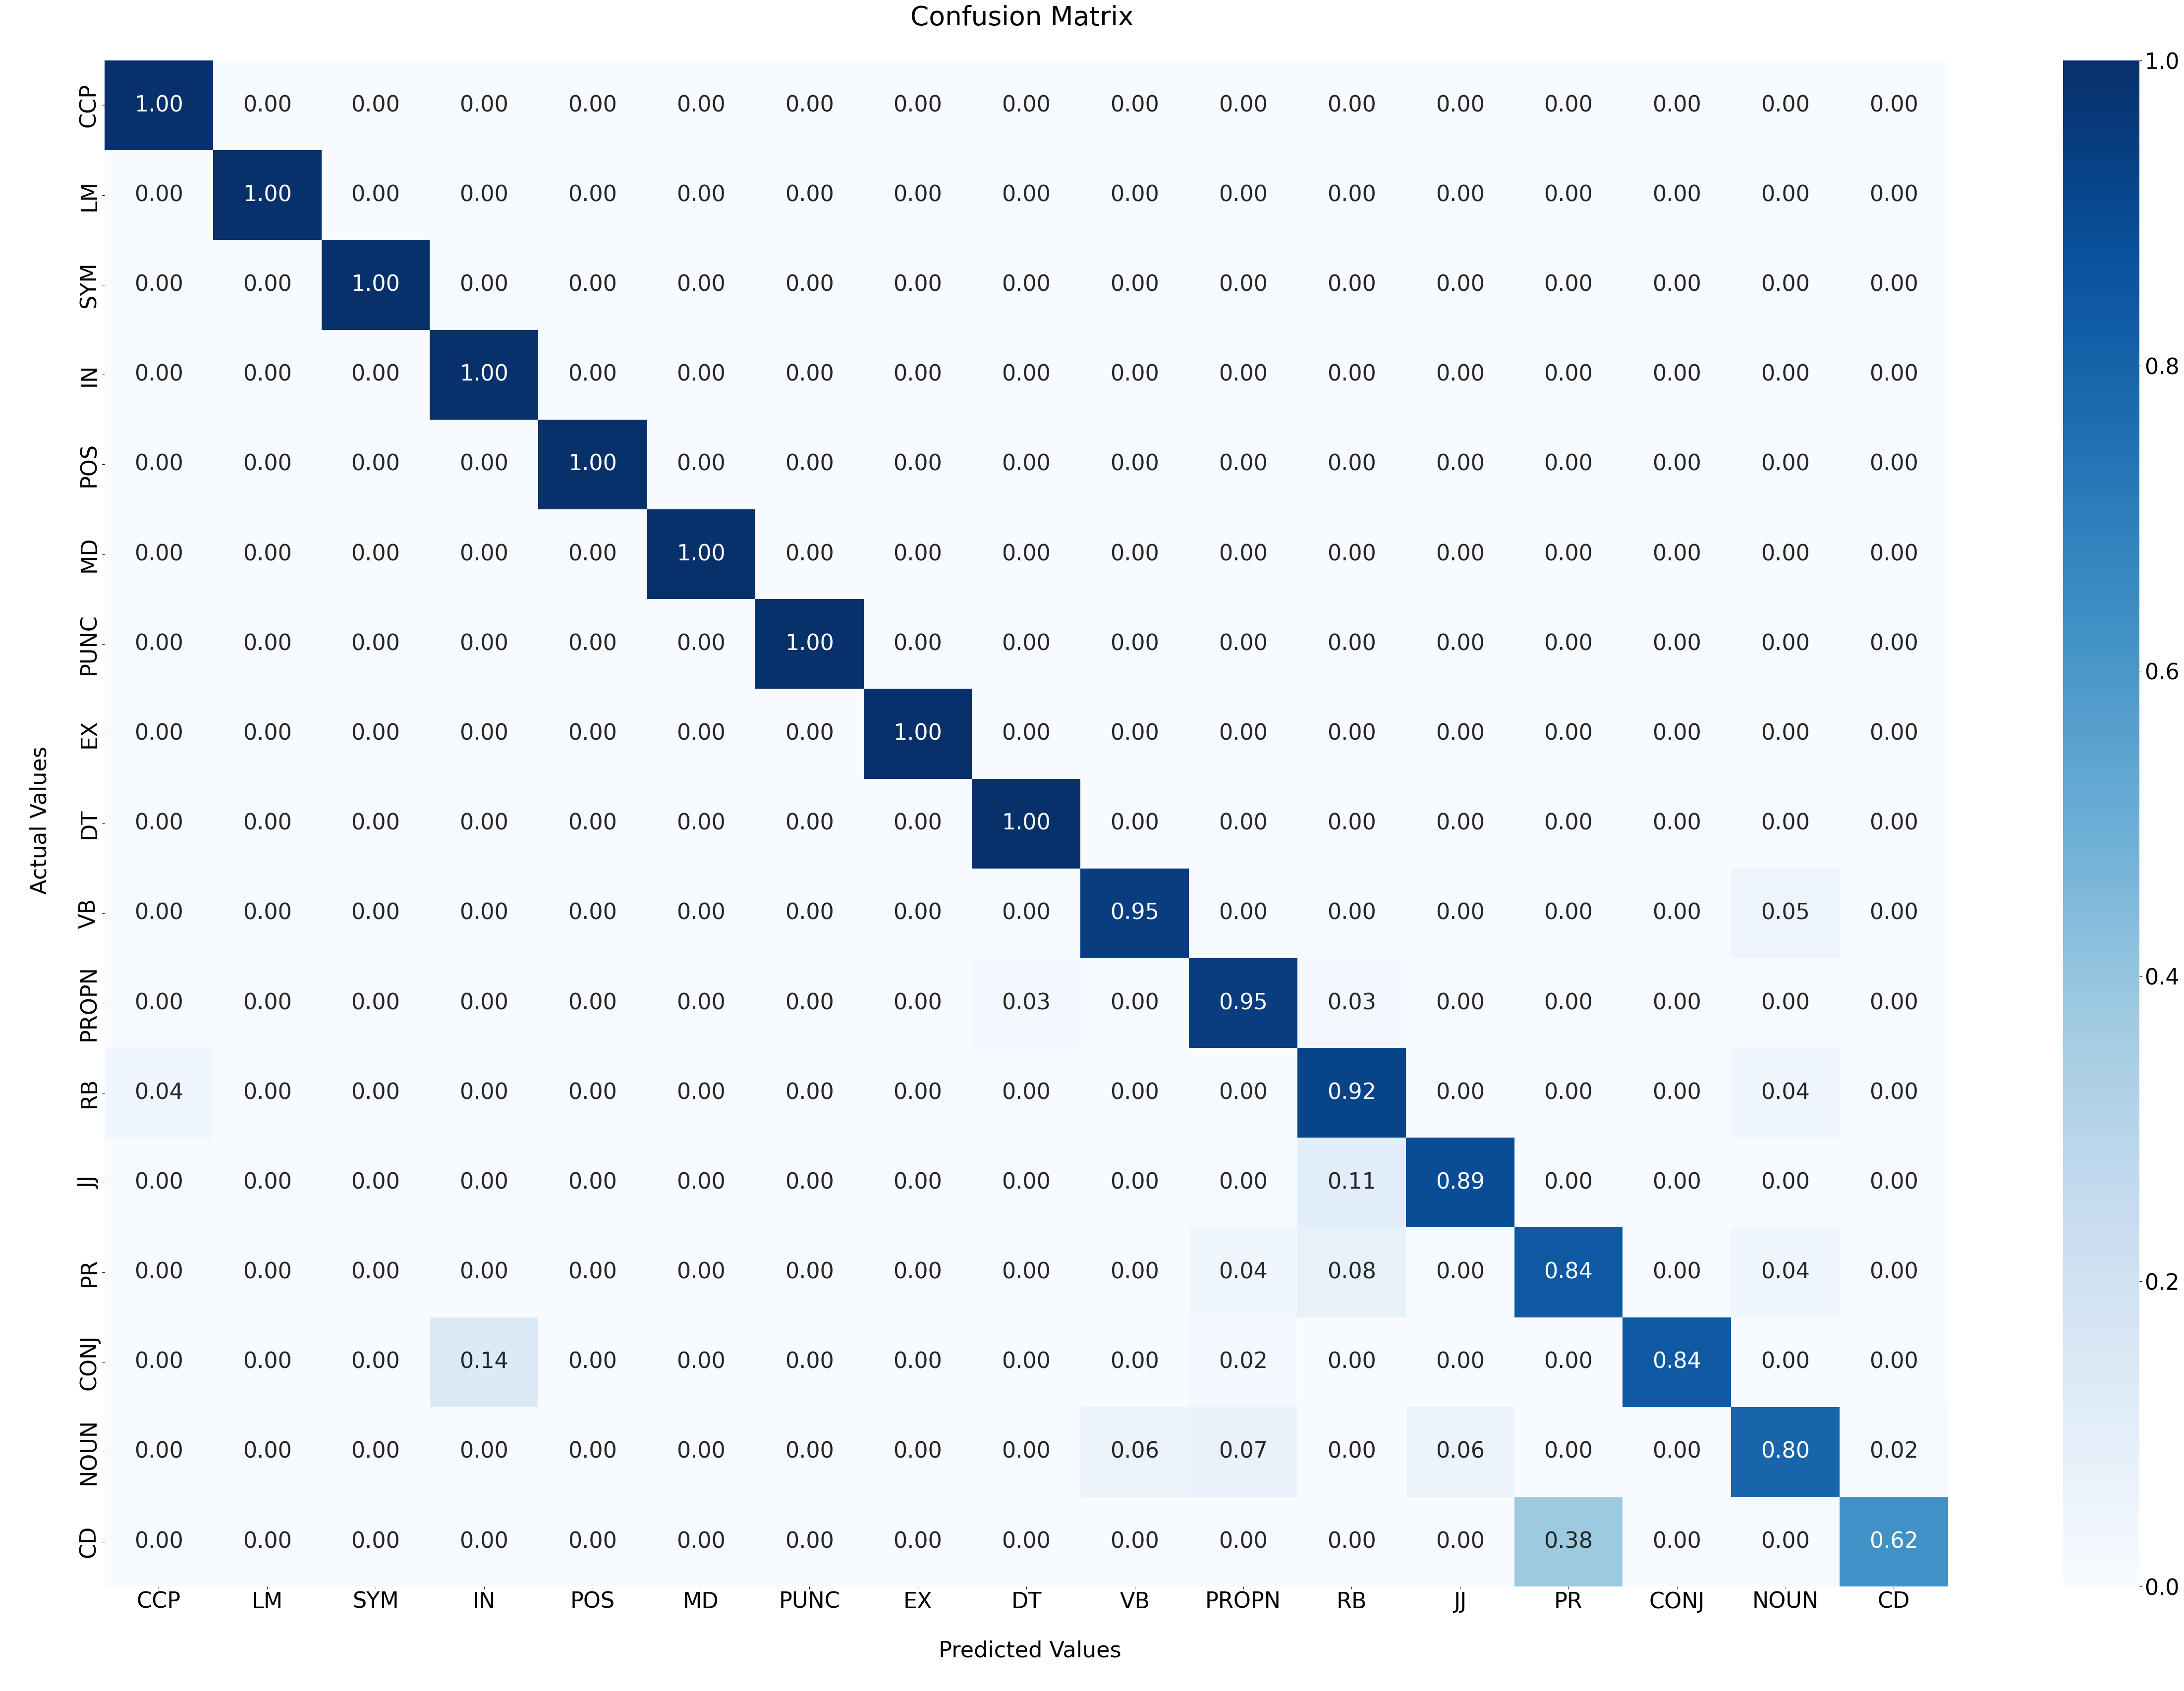

              precision    recall  f1-score   support

         CCP       0.94      1.00      0.97        17
          CD       0.83      0.62      0.71         8
        CONJ       1.00      0.82      0.90        44
          DT       0.97      1.00      0.99        33
          EX       1.00      1.00      1.00         1
          FW       0.00      0.00      0.00         0
          IN       0.25      0.67      0.36         3
          JJ       0.73      0.89      0.80         9
          LM       1.00      0.50      0.67         2
          MD       1.00      1.00      1.00         1
        NOUN       0.91      0.77      0.83        56
         POS       1.00      1.00      1.00         6
          PR       0.88      0.84      0.86        25
       PROPN       0.86      0.95      0.90        38
        PUNC       1.00      1.00      1.00        20
          RB       0.86      0.92      0.89        26
         SYM       1.00      1.00      1.00         2
          VB       0.92    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [27]:
generate_confusion_matrix(sf_combi2_output)